In [0]:
csv_df = spark.read.csv("/FileStore/Day6Data_dbfs.csv", header="True")
display(csv_df)

date,mean_daily_temp,city
05/12/2020,1,Ljubljana
06/12/2020,2,Ljubljana
07/12/2020,2,Ljubljana
08/12/2020,1,Ljubljana
09/12/2020,-1,Ljubljana
10/12/2020,-2,Ljubljana
11/12/2020,0,Ljubljana
12/12/2020,1,Ljubljana
13/12/2020,2,Ljubljana
14/12/2020,3,Ljubljana


In [0]:
#from pyspark.sql.functions import explode
from pyspark.sql import *
import pandas as pd

display(sql("select * from day10.temperature"))

date,mean_daily_temp,city
05/12/2020,1,Ljubljana
06/12/2020,2,Ljubljana
07/12/2020,2,Ljubljana
08/12/2020,1,Ljubljana
09/12/2020,-1,Ljubljana
10/12/2020,-2,Ljubljana
11/12/2020,0,Ljubljana
12/12/2020,1,Ljubljana
13/12/2020,2,Ljubljana
14/12/2020,3,Ljubljana


In [0]:
#for display
display(sql("select * from day10.temperature"))

#to save to variable
df = sql("select * from day10.temperature")


date,mean_daily_temp,city
05/12/2020,1,Ljubljana
06/12/2020,2,Ljubljana
07/12/2020,2,Ljubljana
08/12/2020,1,Ljubljana
09/12/2020,-1,Ljubljana
10/12/2020,-2,Ljubljana
11/12/2020,0,Ljubljana
12/12/2020,1,Ljubljana
13/12/2020,2,Ljubljana
14/12/2020,3,Ljubljana


In [0]:
import pandas as pd

#will return errors
dfa = pd.DataFrame(data=df)
dfa

In [0]:
#so we need to use toPandas():
dfa2 = df.toPandas()
dfa2.astype({'mean_daily_temp': 'float'}).dtypes


Out[46]: date object
mean_daily_temp float64
city object
dtype: object

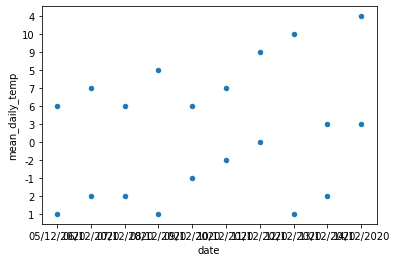

In [0]:

dfa2.plot.scatter(x='date',y='mean_daily_temp')

In [0]:
df1 = sql("select * from day10.temp2")
dfa1 = df1.toPandas()
dfa1

,id_t2,name,temperature
0,2,Seattle`,3
1,1,Ljubljana,-3


In [0]:
result_concat = pd.concat([dfa1,dfa2], keys=['name', 'city'])
result_concat

In [0]:
result_merge = pd.merge(dfa1, dfa2, how='left', left_on='name', right_on='city')
result_merge

,id_t2,name,temperature,date,mean_daily_temp,city
0,2,Seattle`,3,NaN,NaN,NaN
1,1,Ljubljana,-3,05/12/2020,1,Ljubljana
2,1,Ljubljana,-3,06/12/2020,2,Ljubljana
3,1,Ljubljana,-3,07/12/2020,2,Ljubljana
4,1,Ljubljana,-3,08/12/2020,1,Ljubljana
5,1,Ljubljana,-3,09/12/2020,-1,Ljubljana
6,1,Ljubljana,-3,10/12/2020,-2,Ljubljana
7,1,Ljubljana,-3,11/12/2020,0,Ljubljana
8,1,Ljubljana,-3,12/12/2020,1,Ljubljana
9,1,Ljubljana,-3,13/12/2020,2,Ljubljana


Let's get now some data from Databricks sample data (that is available to anybody)

In [0]:
import pandas as pd

dfcovid = pd.read_csv("/dbfs/databricks-datasets/COVID/covid-19-data/us-states.csv")
dfcovid.head()


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


and now let's scatter plot some number of cases and deaths per states

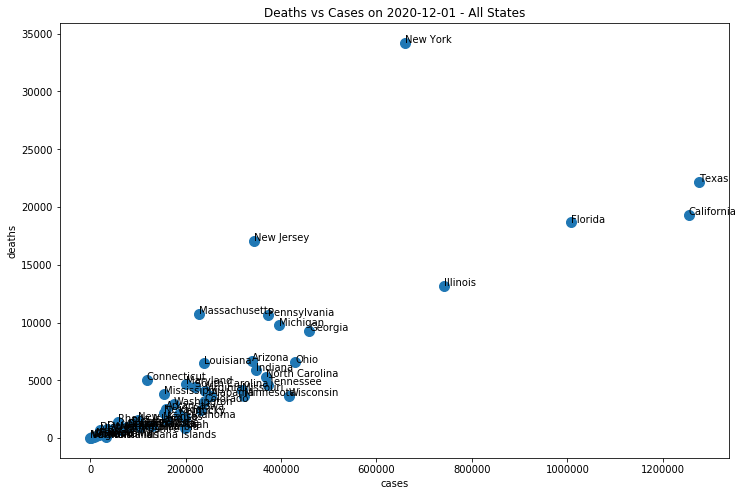

In [0]:
# Filter to 2020-12-01 on first of december
df_12_01 = dfcovid[dfcovid["date"] == "2020-12-01"] 

ax = df_12_01.plot(x="cases", y="deaths", kind="scatter", 
                   figsize=(12,8), s=100, title="Deaths vs Cases on 2020-12-01 - All States")

df_12_01[["cases", "deaths", "state"]].apply(lambda row: ax.text(*row), axis=1);

And now let's compare only couple of these extreme states (New York, Texas, California and Florida)

In [0]:

df_ny_cal_tex_flor = dfcovid[(dfcovid["state"] == "New York") | (dfcovid["state"] == "California") | (dfcovid["state"] == "Florida") | (dfcovid["state"] == "Texas")]


In [0]:
# Let's pivot our df_ny_cali DataFrame so that we can plot deaths over time for all states
df_ny_cal_tex_flor = df_ny_cal_tex_flor.pivot(index='date', columns='state', values='deaths').fillna(0)
df_ny_cal_tex_flor


state,California,Florida,New York,Texas
date,,,,
2020-01-25,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-12-06,19937.0,19176.0,34552.0,23187.0
2020-12-07,20052.0,19281.0,34637.0,23258.0
2020-12-08,20238.0,19377.0,34723.0,23439.0


and now plot this data

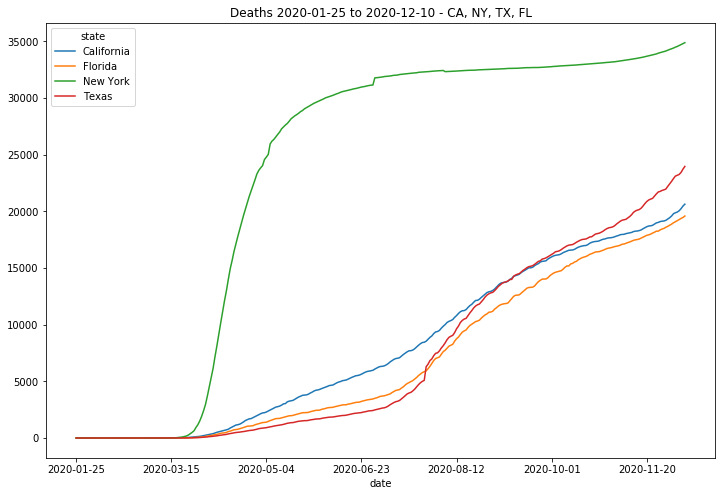

In [0]:
df_ny_cal_tex_flor.plot.line(title="Deaths 2020-01-25 to 2020-12-10 - CA, NY, TX, FL", figsize=(12,8))

And now for a simple regression analysis, we will split data from test and train. Since the first and second wave we will need to thing how to split the data.
Let's split it until mid of November and after mid of November

In [0]:
train_df = dfcovid[(dfcovid["date"] >= "2020-07-01") & (dfcovid["date"] <= "2020-11-15")]
test_df = dfcovid[dfcovid["date"] > "2020-11-16"]

X_train = train_df[["cases"]]
y_train = train_df["deaths"]

X_test = test_df[["cases"]]
y_test = test_df["deaths"]

We will use scikit-learn to do simple linear regression.

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print(f"num_deaths = {lr.intercept_:.4f} + {lr.coef_[0]:.4f}*cases")

num_deaths = 420.6934 + 0.0256*cases

So if we have no cases, then there should be no deaths caused by COVID-19; this gives us a base line and assume that let's set the intercept to be 0.

In [0]:
lr = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print(f"num_deaths = {lr.coef_[0]:.4f}*cases")

num_deaths = 0.0268*cases

This model imposes that there is a 2.68% mortality rate in our dataset. But we know that some states have higher mortality rates and that linear model is absolutely not ideal for that, but it is just to showcase for using Python in Databricks.